# IPython notebook backed by an F# kernel

## Examples

In [1]:
"Last value displayed"

"Last value displayed"

In [2]:
errors are displayed

input.fsx(1,1): error FS0039: The value or constructor 'errors' is not defined

## Utility Methods

In [2]:
Util.Html("<b>Inline HTML</b>") |> Display

Inline HTML

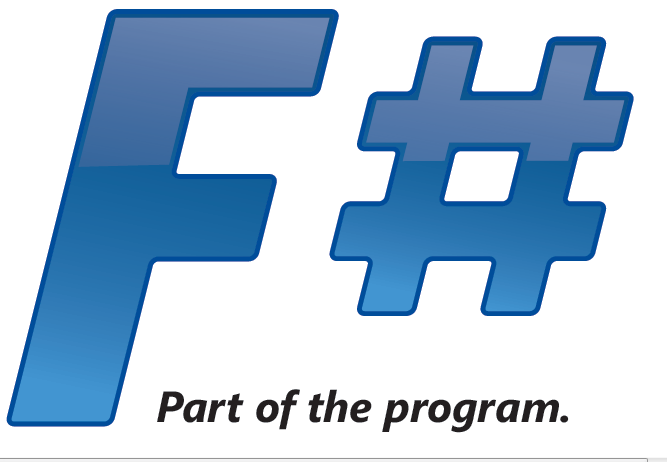

In [8]:
Util.Url("https://upload.wikimedia.org/wikipedia/commons/9/93/FSharp_Logo.png") |> Display

In [9]:
Util.Math("f(x) = sin(x)") |> Display

In [10]:
let data = [ ("F#", 10); ("C#", 5); ("C++", 20); ("Java", 1); ]
Util.Table(data) |> Display

Item1,Item2
F#,10
C#,5
C++,20
Java,1


## F# Charting

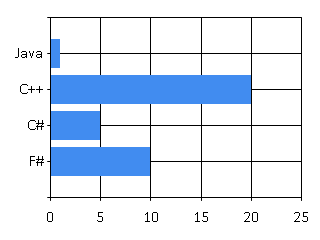

In [12]:
Chart.Bar(data) |> Display

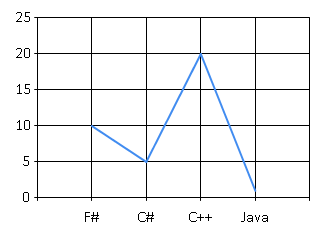

In [13]:
Chart.Line(data) |> Display

## Random things

In [14]:
let linspace (min : float, max : float, dx : float) =
    if min > max then failwith (sprintf "min [%f] cannot be greater than max [%f]" min max)
    if dx = 0.0 then failwith ("dx cannot be zero")
    
    let x = ref min
    seq {
        while !x < max do
            x := !x + dx
            yield !x
    }

In [15]:
let plot (data:seq<float>, cb) =
    let results = 
        seq {
            for x in data do
                yield (x, cb(x))
        }

    Chart.Line (results)

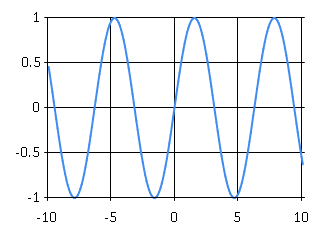

In [16]:
let x = linspace (-10.0, 10.0, 0.1)
plot(x, fun y -> sin(y)) |> Display
Util.Math "f(x) = sin(x)" |> Display

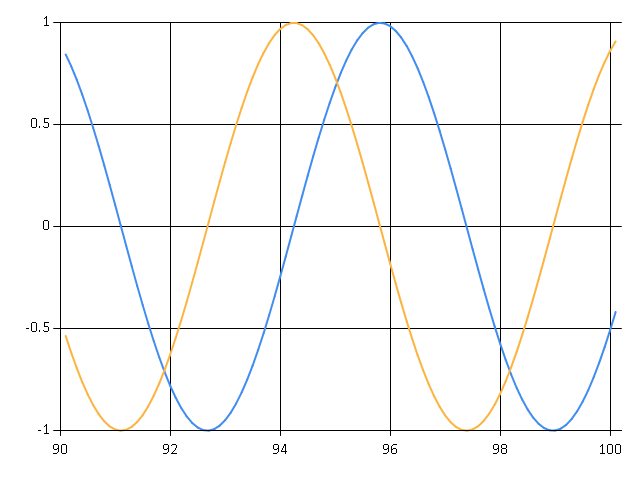

In [17]:
(** This actually does animation when running *)
open System.Threading

for i in 1 .. 100 do

    Clear() |> ignore

    let x = linspace(-10.0 + float(i), float(i), 0.1) |> Seq.toArray
    let c1 = plot(x, sin)
    let c2 = plot(x, cos)

    Chart.Combine([c1; c2])
    |> Chart.WithSize(640, 480)
    |> Display
    |> ignore
    
    Thread.Sleep(20)